In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

%matplotlib inline

In [6]:
fem = pd.read_csv("delitos-por-feminicidio-en-jalisco-por-municipio-periodo-2016-agosto2021.csv", engine = "python")


In [7]:
fem.info

<bound method DataFrame.info of      clave_mun                municipio  2017  2018  2019  2020  ago-21
0            1                   ACATIC     0     1     0     0       0
1            2        ACATLAN DE JUAREZ     0     0     0     1       0
2            3     AHUALULCO DE MERCADO     0     0     0     2       0
3            4                 AMACUECA     0     0     0     0       0
4            5                 AMATITAN     0     0     0     0       0
..         ...                      ...   ...   ...   ...   ...     ...
121        122    ZAPOTITLAN DE VADILLO     0     0     0     0       0
122        123         ZAPOTLAN DEL REY     0     0     0     0       0
123        124              ZAPOTLANEJO     0     0     2     1       0
124        125  SAN IGNACIO CERRO GORDO     0     0     0     0       0
125        999                     N.D.     0     0     0     0       0

[126 rows x 7 columns]>

In [8]:
fem.head()

,clave_mun,municipio,2017,2018,2019,2020,ago-21
0,1,ACATIC,0,1,0,0,0
1,2,ACATLAN DE JUAREZ,0,0,0,1,0
2,3,AHUALULCO DE MERCADO,0,0,0,2,0
3,4,AMACUECA,0,0,0,0,0
4,5,AMATITAN,0,0,0,0,0


In [13]:
fem_util = fem.drop(["clave_mun"], axis = 1)

In [14]:
fem_ut = fem_util.drop(["municipio"], axis = 1)

In [15]:
fem_ut.describe()

,2017,2018,2019,2020,ago-21
count,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.214286,0.253968,0.349206,0.492063,0.404762
std,0.699796,0.789293,1.266917,1.849307,1.758083
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,6.000000,6.000000,10.000000,13.000000,12.000000


In [18]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, max_iter = 300)
    kmeans.fit(fem_ut)
    wcss.append(kmeans.inertia_)

<function matplotlib.pyplot.show(close=None, block=None)>

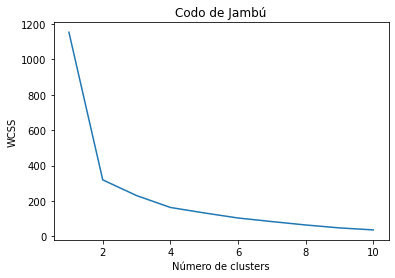

In [19]:
plt.plot(range(1,11), wcss)
plt.title("Codo de Jambú")
plt.xlabel("Número de clusters")
plt.ylabel("WCSS")
plt.show

Es mejor usar dos clusters

In [20]:
clustering = KMeans(n_clusters = 2, max_iter = 300)
clustering.fit(fem_ut)

KMeans(n_clusters=2)

In [37]:
fem["Kmeans_clusters"] = clustering.labels_
fem.head()

,clave_mun,municipio,2017,2018,2019,2020,ago-21,Kmeans clusters,Kmeans_clusters
0,1,ACATIC,0,1,0,0,0,0,0
1,2,ACATLAN DE JUAREZ,0,0,0,1,0,0,0
2,3,AHUALULCO DE MERCADO,0,0,0,2,0,0,0
3,4,AMACUECA,0,0,0,0,0,0,0
4,5,AMATITAN,0,0,0,0,0,0,0


In [33]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_fem = pca.fit_transform(fem_ut)
pca_fem_df = pd.DataFrame(data = pca_fem, columns = ["Componente_1", "Componente_2"])
pca_nom_fem = pd.concat([pca_fem_df, fem[["Kmeans_clusters"]]], axis = 1)

pca_nom_fem

,Componente_1,Componente_2,Kmeans clusters
0,-0.528292,0.037328,0
1,-0.148026,-0.498548,0
2,0.488233,-1.067435,0
3,-0.784284,0.070340,0
4,-0.784284,0.070340,0
...,...,...,...
121,-0.784284,0.070340,0
122,-0.784284,0.070340,0
123,0.673221,-0.854556,0
124,-0.784284,0.070340,0


AttributeError: 'DataFrame' object has no attribute 'Kmeans_clusters'

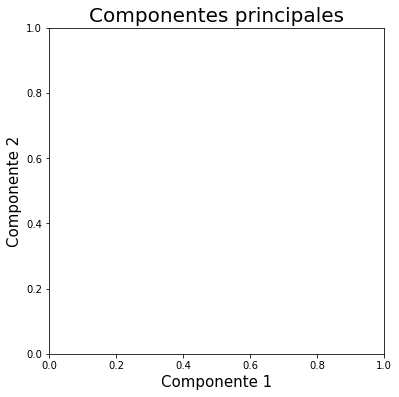

In [43]:
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 1', fontsize = 15)
ax.set_ylabel('Componente 2', fontsize = 15)
ax.set_title('Componentes principales', fontsize = 20)

color_theme = np.array(['blue', 'black', 'green'])
ax.scatter(x = pca_nom_fem.Componente_1, y = pca_nom_fem.Componente_2, c = color_theme[pca_nom_fem.Kmeans_clusters])

plt.show()
